In [1]:
import sklearn.metrics
%load_ext autoreload
%autoreload 2

# Модель линейной регрессии

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


import os
import src

from dotenv import load_dotenv

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Подготовка данных

In [4]:
load_dotenv(override=True)

WORK_DIR = os.getenv("DATA_DIR")
FILE_NAME = 'df_work_test.zip'

filepath = f'..\\{WORK_DIR}\\{FILE_NAME}'

df1 = pd.read_csv(filepath, index_col=0, parse_dates=True)

In [5]:
X = df1.drop(['Fe2+', 'ac'], axis=1)
X.reset_index(drop=True)
y = df1['Fe2+']
y.reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Подготовка данных и тренировка модели

In [6]:
linear = make_pipeline(
    StandardScaler(),
    # PCA(),
    ElasticNet()
)

In [7]:
param_grid = {
    # "pca__n_components" : ['mle', 10, 30, None],
    "elasticnet__l1_ratio": [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9]
}

search = GridSearchCV(linear, param_grid, n_jobs=2, cv=5, scoring='neg_mean_absolute_error')

search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.337):
{'elasticnet__l1_ratio': 0.1}


Метрики качества
RMSE: 0.7375
MAE: 0.3407
R2: 0.2273


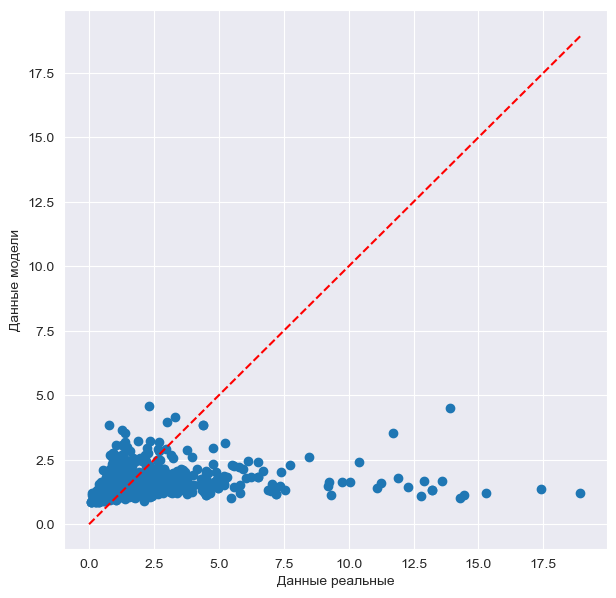

In [8]:
src.lib.model_score(search.best_estimator_, X_test, y_test)